<a href="https://colab.research.google.com/github/PraveenGit3/Analytic-Projects-in-Python-EDA/blob/master/Movie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

#Import required packages 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as snb


In [28]:
#Read the csv file using pandas 
df=pd.read_csv("/content/drive/My Drive/tmdb_movies_data.csv")
df.head(5)
#To view as Table

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [29]:
df['genre_1'] = df.genres.str.split('|').str.get(0)
df['genre_2'] = df.genres.str.split('|').str.get(1)
df['genre_3'] = df.genres.str.split('|').str.get(2)
df['genre_4'] = df.genres.str.split('|').str.get(3)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,NaN,NaN,NaN
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure,Drama,NaN
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy,NaN,NaN
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy,NaN,NaN


In [40]:
#let us check the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [43]:
df.drop(['id','imdb_id', 'cast','homepage','tagline','keywords','overview','runtime'], axis=1, inplace=True)
df
#Fill in the nulls
df.fillna(df.mean(), inplace=True)
#And check the information after drop and fill in the nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
 13  genre_1               10843 non-null  object 
 14  genre_2               8515 non-null   object 
 15  genre_3            

In [44]:

#check what are the films without genres, then drop the rows of films without genre.
df[df.genre_1.isnull()]

,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4
424,0.244648,0,0,Belli di papÃ,Guido Chiesa,NaN,NaN,10/29/2015,21,6.1,2015,0.00000,0.0,NaN,NaN,NaN,NaN
620,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,Ruthless Pictures|Hollywood Shorts,10/6/2015,13,5.0,2015,0.00000,0.0,NaN,NaN,NaN,NaN
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,NaN,NaN,10/3/2014,13,6.8,2014,0.00000,0.0,NaN,NaN,NaN,NaN
1712,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,NaN,Daniel Sladek Entertainment,2/27/2009,57,7.4,2009,0.00000,0.0,NaN,NaN,NaN,NaN
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,NaN,NaN,2/27/2009,11,7.0,2009,0.00000,0.0,NaN,NaN,NaN,NaN
2370,0.081892,0,0,Freshman Father,Michael Scott,NaN,NaN,6/5/2010,12,5.8,2010,0.00000,0.0,NaN,NaN,NaN,NaN
2376,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,NaN,NaN,12/25/2010,11,7.7,2010,0.00000,0.0,NaN,NaN,NaN,NaN
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,NaN,NaN,2/2/2001,12,7.2,2001,0.00000,0.0,NaN,NaN,NaN,NaN
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,NaN,NaN,8/13/2008,11,6.1,2008,0.00000,0.0,NaN,NaN,NaN,NaN
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,NaN,BBC,7/27/2012,12,8.3,2012,0.00000,0.0,NaN,NaN,NaN,NaN


# **Research Question 1:Which genres are most popular from year to year?**

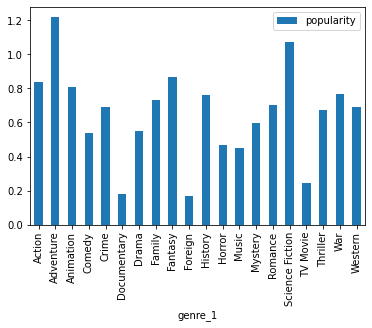

In [45]:
#Find the relationship between the first film genres and the popularity.
df.groupby('genre_1')['popularity'].mean().plot(kind='bar', label ="popularity")
#As you can see, the most popular films along the years are Adventure, Romance and Actions movies.
plt.legend()

Insight from this plot: As you can see, the most popular films along the years are Adventure, Romance and Actions movies.


# **2.most popular genre movies from year to year**

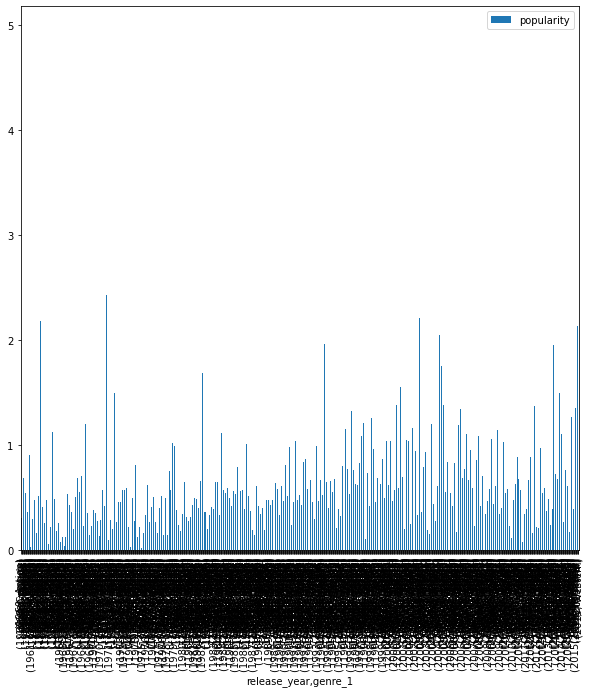

In [46]:
#let's check what are the most popular genre movies from year to year
df.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar',figsize=(10,10), label="popularity")
#Show the plot and see the relationship
plt.legend()

# As you can see from the graph, we have insert too many years in the dataset, is not clear to see the results and the relationship between years, genre and popularity. So we´d better only choose some certain years to analyze

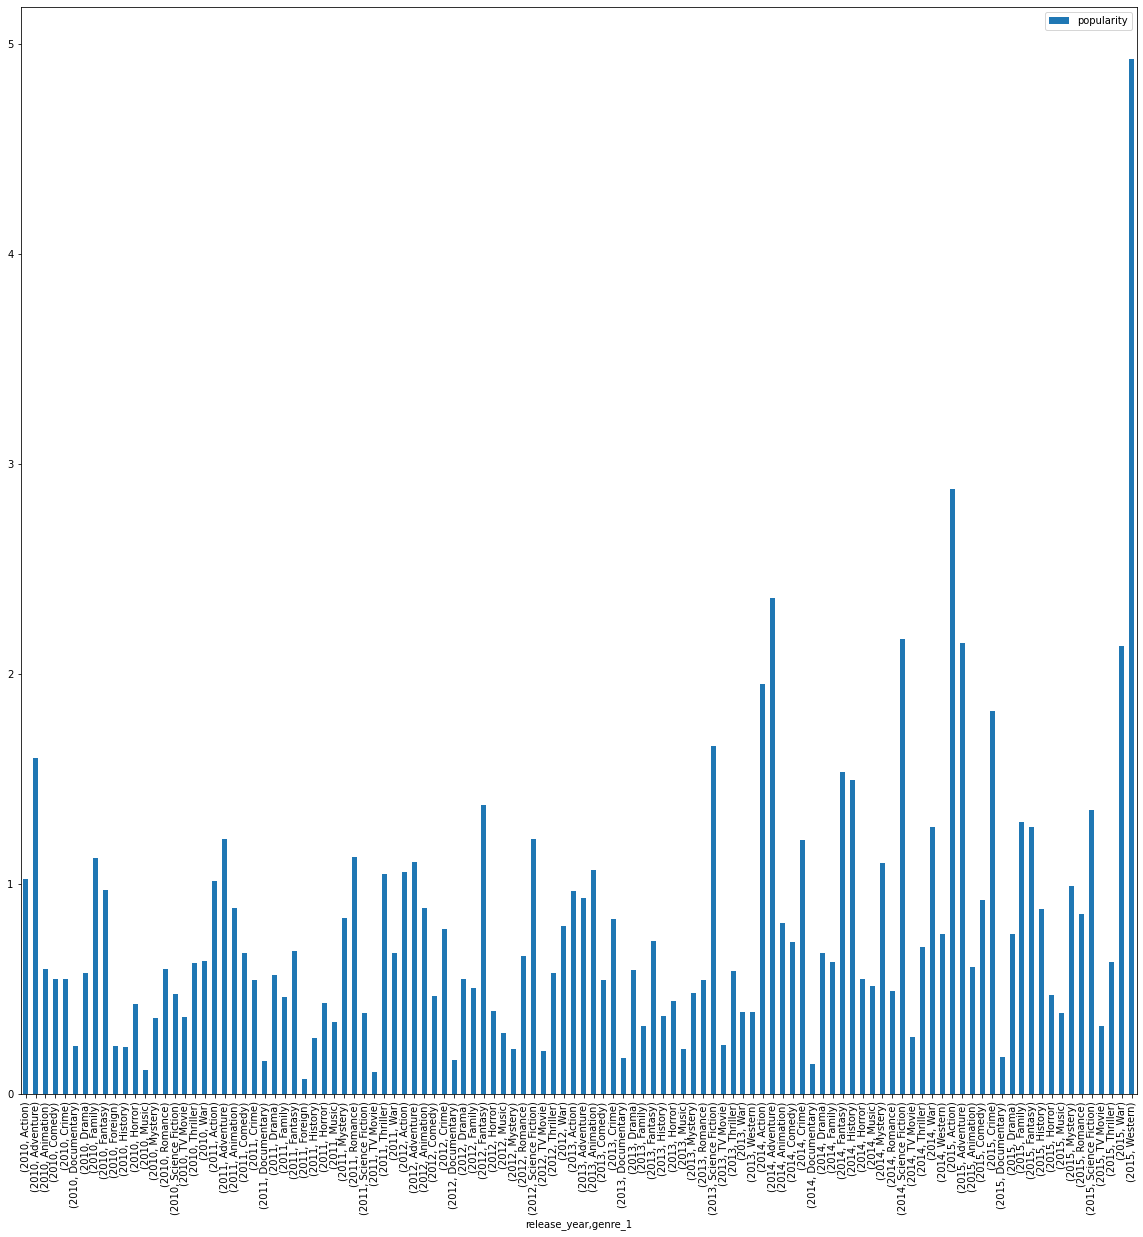

In [47]:
#So let´s choose the last 5 years to analyze, it is more feasible.
last_5_years = df[df['release_year'] >= 2010]
last_5_years.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar',figsize=(20,20), label="popularity")
plt.legend()

# We can see all the years along from 2010 to 2015 in the unique plot, we can see the tendency the popularity for all the genres is increasing, but we like to see more clear the most popular genre of file one year by one year.¶

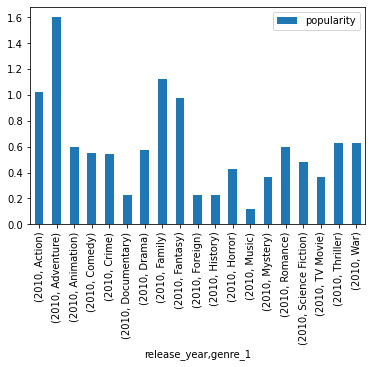

In [48]:
#Still not clear? let´s see the relationship between genre and popularity for every year then
year_2010 = df[df['release_year'] == 2010]
year_2011 = df[df['release_year'] == 2011]
year_2012 = df[df['release_year'] == 2012]
year_2013 = df[df['release_year'] == 2013]
year_2014 = df[df['release_year'] == 2014]
year_2015 = df[df['release_year'] == 2015]

year_2010.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', label ="popularity")
plt.legend()
plt.show()

# **Research Question 2: What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?¶**

In [49]:
df[df['revenue'].notnull()][['original_title','budget','revenue']].sort_values('revenue',ascending=False).head(10)

,original_title,budget,revenue
1386,Avatar,237000000,2781505847
3,Star Wars: The Force Awakens,200000000,2068178225
5231,Titanic,200000000,1845034188
4361,The Avengers,220000000,1519557910
0,Jurassic World,150000000,1513528810
4,Furious 7,190000000,1506249360
14,Avengers: Age of Ultron,280000000,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,125000000,1327817822
5422,Frozen,150000000,1274219009
5425,Iron Man 3,200000000,1215439994


In [50]:
#Let´s try to see how is the revenue related to the vote average score
df[df['revenue'].notnull()][['original_title','vote_average','revenue']].sort_values('revenue',ascending=False).head(10)

,original_title,vote_average,revenue
1386,Avatar,7.1,2781505847
3,Star Wars: The Force Awakens,7.5,2068178225
5231,Titanic,7.3,1845034188
4361,The Avengers,7.3,1519557910
0,Jurassic World,6.5,1513528810
4,Furious 7,7.3,1506249360
14,Avengers: Age of Ultron,7.4,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,7.7,1327817822
5422,Frozen,7.5,1274219009
5425,Iron Man 3,6.9,1215439994


As you can see, the vote average score does not affect directly the revenue neither
# Then let´s assume the film genre and the popularity will affect the revenue?

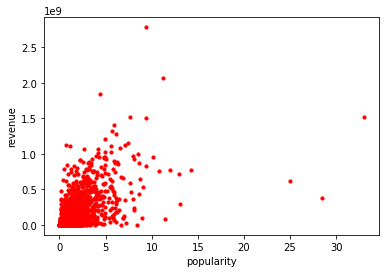

In [53]:
#let´s see the relationship between popularity and revenue more clearly in graph
df.plot.scatter('popularity', 'revenue', s=10, c='red')

From the analysis I have done, we have solved two questions. 1. What are the most popular genre of movies from years to years. 2. What are the factores affect the revenue.Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue? I have chose the last 5 years to see more clear the most popular genre. The conclusion are below:

In 2011, the most popular genre is adventure

In 2012 the most popular genre is Fantasy

In 2013, the most popular genre is science ficction

In 2014, the most popular genre is still adventure

In 2015, the most popular genre is Western

## The answer for the second question is: The budget and voted score do not affect directly to the revenue. The factor which affect the revenue is the popularity. As you can see in the plot and the analysis before.